In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/games'

/content/gdrive/MyDrive/games


In [ ]:
!ls beat_saber

group1_order1_user0_fast_movement.csv	group1_order2_user0_fast_movement.csv
group1_order1_user10_fast_movement.csv	group1_order2_user10_fast_movement.csv
group1_order1_user11_fast_movement.csv	group1_order2_user11_fast_movement.csv
group1_order1_user12_fast_movement.csv	group1_order2_user12_fast_movement.csv
group1_order1_user13_fast_movement.csv	group1_order2_user13_fast_movement.csv
group1_order1_user14_fast_movement.csv	group1_order2_user14_fast_movement.csv
group1_order1_user1_fast_movement.csv	group1_order2_user1_fast_movement.csv
group1_order1_user2_fast_movement.csv	group1_order2_user2_fast_movement.csv
group1_order1_user3_fast_movement.csv	group1_order2_user3_fast_movement.csv
group1_order1_user4_fast_movement.csv	group1_order2_user4_fast_movement.csv
group1_order1_user5_fast_movement.csv	group1_order2_user5_fast_movement.csv
group1_order1_user6_fast_movement.csv	group1_order2_user6_fast_movement.csv
group1_order1_user7_fast_movement.csv	group1_order2_user7_fast_movement.csv
gr

In [4]:
def read_csv_files(directory):
    """
    Read all CSV files in the given directory into a single DataFrame.
    """
    csv_files = [filename for filename in os.listdir(directory) if filename.endswith('.csv')]
    all_data = []
    for filename in csv_files:
        file_path = os.path.join(directory, filename)
        data = pd.read_csv(file_path)
        all_data.append(data)
    if all_data:
        print("Data loaded successfully.")
        return pd.concat(all_data, ignore_index=True)
    else:
        print("No CSV files found in the directory:", directory)
        return pd.DataFrame()  # Return an empty DataFrame

In [5]:
def main():
    # Directories containing CSV files
    beat_saber_directory = "/content/gdrive/MyDrive/games/beat_saber"

    # Read all CSV files in the directories into a single DataFrame
    beat_saber_data = read_csv_files(beat_saber_directory)

In [6]:
def euler_from_quaternion(x, y, z, w):
    """
    Convert a quaternion into euler angles (roll, pitch, yaw)
    roll is rotation around x in radians (counterclockwise)
    pitch is rotation around y in radians (counterclockwise)
    yaw is rotation around z in radians (counterclockwise)
    """
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = math.atan2(t3, t4)

    return roll_x, pitch_y, yaw_z # in radians

In [7]:
beat_saber_directory = "/content/gdrive/MyDrive/games/beat_saber"
csv_files = [filename for filename in os.listdir(beat_saber_directory) if filename.endswith('.csv')]

if csv_files:
    print("CSV files found in the directory:")
    for file in csv_files:
        print(file)
else:
    print("No CSV files found in the directory:", beat_saber_directory)


CSV files found in the directory:
group1_order2_user14_fast_movement.csv
group1_order2_user13_fast_movement.csv
group1_order2_user12_fast_movement.csv
group1_order2_user11_fast_movement.csv
group1_order2_user10_fast_movement.csv
group1_order2_user9_fast_movement.csv
group1_order2_user8_fast_movement.csv
group1_order2_user7_fast_movement.csv
group1_order2_user6_fast_movement.csv
group1_order2_user5_fast_movement.csv
group1_order2_user4_fast_movement.csv
group1_order2_user3_fast_movement.csv
group1_order2_user2_fast_movement.csv
group1_order2_user1_fast_movement.csv
group1_order2_user0_fast_movement.csv
group1_order1_user14_fast_movement.csv
group1_order1_user13_fast_movement.csv
group1_order1_user12_fast_movement.csv
group1_order1_user11_fast_movement.csv
group1_order1_user10_fast_movement.csv
group1_order1_user9_fast_movement.csv
group1_order1_user8_fast_movement.csv
group1_order1_user7_fast_movement.csv
group1_order1_user5_fast_movement.csv
group1_order1_user6_fast_movement.csv
group1

In [8]:
beat_saber_data = read_csv_files(beat_saber_directory)
print(type(beat_saber_data))  # Print the type of beat_saber_data

Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>


In [9]:
 # Extract orientation and position beat_saber_data
orientation_w = beat_saber_data["HeadOrientationW"]
orientation_x = beat_saber_data["HeadOrientationX"]
orientation_y = beat_saber_data["HeadOrientationY"]
orientation_z = beat_saber_data["HeadOrientationZ"]
position_x = beat_saber_data["HeadPosX"]
position_y = beat_saber_data["HeadPosY"]
position_z = beat_saber_data["HeadPosZ"]
time = beat_saber_data["time"]

In [10]:
 # Convert from quaternions to euler angles
roll = []
pitch = []
yaw = []
for i in range(len(orientation_w)):
      roll_temp, pitch_temp, yaw_temp = euler_from_quaternion(orientation_z[i], orientation_x[i], orientation_y[i], orientation_w[i])
      roll.append(np.rad2deg(roll_temp))
      pitch.append(np.rad2deg(pitch_temp))
      yaw.append(np.rad2deg(yaw_temp))

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


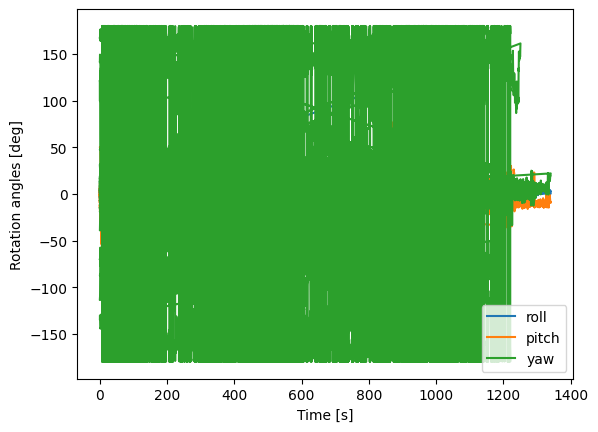

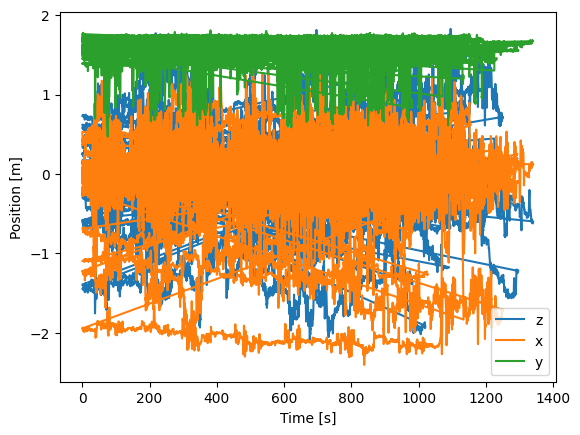

Data loaded successfully.


In [11]:
# Plot the figures
import matplotlib.pyplot as plt
plt.figure()
plt.ylabel('Rotation angles [deg]')
plt.xlabel('Time [s]')
plt.plot(time, roll)
plt.plot(time, pitch)
plt.plot(time, yaw)
plt.legend(['roll', 'pitch', 'yaw'])

plt.figure()
plt.ylabel('Position [m]')
plt.xlabel('Time [s]')
plt.plot(time, position_z)
plt.plot(time, position_x)
plt.plot(time, position_y)
plt.legend(['z', 'x', 'y'])

plt.show()

if __name__ == '__main__':
    main()

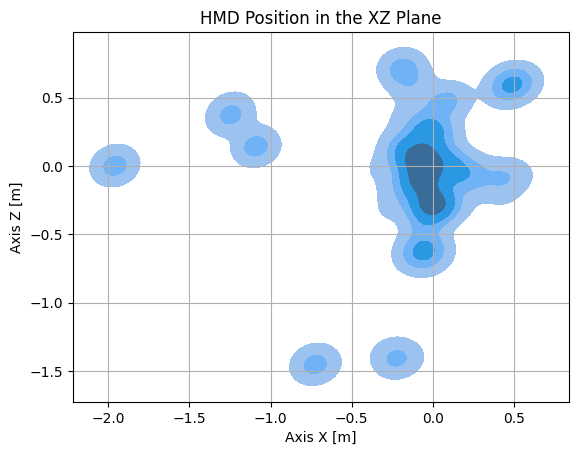

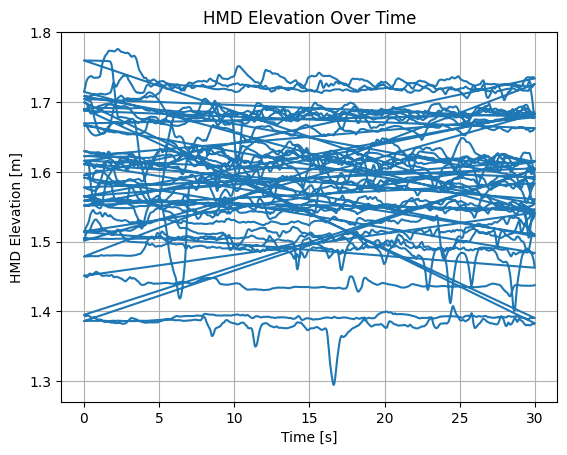

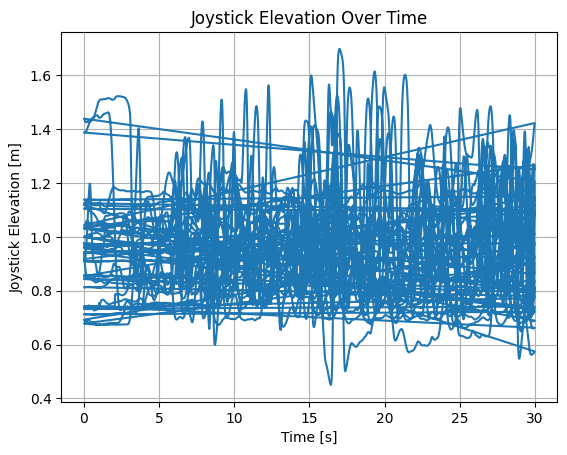

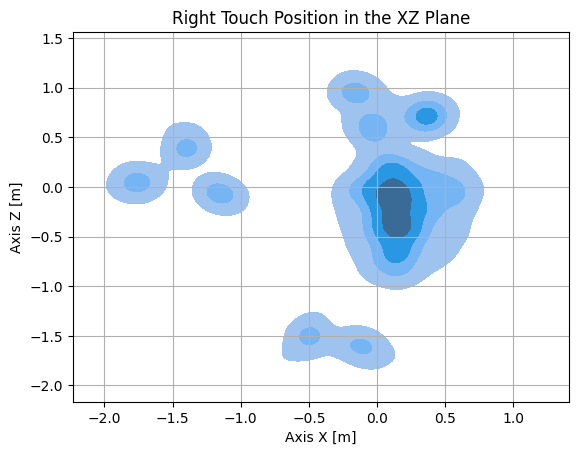

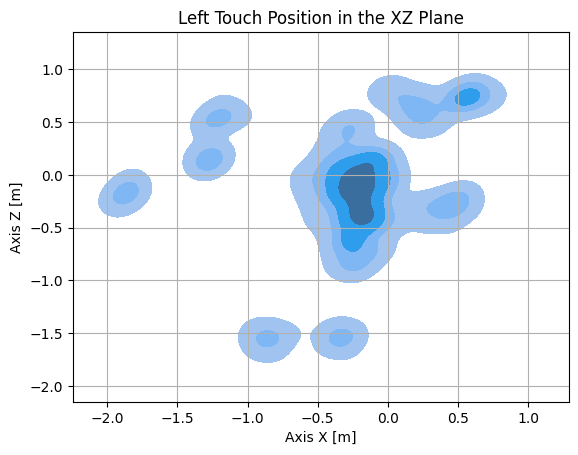

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def main():
    # Load csv
    df = pd.DataFrame(beat_saber_data)

    # Convert columns to float if necessary
    numeric_columns = ['HeadPosX', 'HeadPosY', 'HeadPosZ', 'RightTouchPosY', 'time']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Filter the time interval
    time_i = 0  # Define your start time
    time_f = 30  # Define your end time
    df = df[(df['time'] >= time_i) & (df['time'] <= time_f)]

    # Plot the heatmap of the HMD position in the XZ plane
    sns.kdeplot(data=df, x='HeadPosX', y='HeadPosZ', fill=True, n_levels=5)  # Pass df directly to data parameter
    plt.title("HMD Position in the XZ Plane")
    plt.xlabel("Axis X [m]")
    plt.ylabel("Axis Z [m]")
    plt.grid(True)
    plt.show()
     # Plot the HMD elevation over time
    plt.title("HMD Elevation Over Time")
    plt.plot(df['time'], df['HeadPosY'])
    plt.xlabel("Time [s]")
    plt.ylabel("HMD Elevation [m]")
    plt.grid(True)
    plt.show()

    # Plot the joystick elevation over time
    plt.title("Joystick Elevation Over Time")
    plt.plot(df['time'], df['RightTouchPosY'])
    plt.xlabel("Time [s]")
    plt.ylabel("Joystick Elevation [m]")
    plt.grid(True)
    plt.show()
         # Plot the heatmap for the right touch position in the X-Z plane
    sns.kdeplot(data=df, x='RightTouchPosX', y='RightTouchPosZ', fill=True, levels=5)
    plt.title("Right Touch Position in the XZ Plane")
    plt.xlabel("Axis X [m]")
    plt.ylabel("Axis Z [m]")
    plt.grid(True)
    plt.show()

# Plot the heatmap for the left touch position in the X-Z plane
    sns.kdeplot(data=df, x='LeftTouchPosX', y='LeftTouchPosZ', fill=True, levels=5)
    plt.title("Left Touch Position in the XZ Plane")
    plt.xlabel("Axis X [m]")
    plt.ylabel("Axis Z [m]")
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
def find_missing_values(df):
    """
    Find missing values in the DataFrame.
    """
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

# Assuming 'directory' is the directory path where CSV files are located
# Load CSV files into a DataFrame using the read_csv_files function

beat_saber_data = read_csv_files(beat_saber_directory)
# Find missing values in the DataFrame
missing_values = find_missing_values(beat_saber_data)

if not missing_values.empty:
    print("Missing values found:")
    print(missing_values)
else:
    print("No missing values found in the DataFrame.")


Data loaded successfully.
No missing values found in the DataFrame.


In [ ]:
# Print column names of the DataFrame
print(beat_saber_data.columns)

Index(['TouchButtons', 'LeftIndexTrigger', 'RightIndexTrigger',
       'LeftHandTrigger', 'RightHandTrigger', 'LeftTouchPosX', 'LeftTouchPosY',
       'LeftTouchPosZ', 'LeftTouchOrientationW', 'LeftTouchOrientationX',
       'LeftTouchOrientationY', 'LeftTouchOrientationZ', 'RightTouchPosX',
       'RightTouchPosY', 'RightTouchPosZ', 'RightTouchOrientationW',
       'RightTouchOrientationX', 'RightTouchOrientationY',
       'RightTouchOrientationZ', 'HeadPosX', 'HeadPosY', 'HeadPosZ',
       'HeadOrientationW', 'HeadOrientationX', 'HeadOrientationY',
       'HeadOrientationZ', 'time'],
      dtype='object')


In [ ]:
import os

def reidentify_users(file_names):
    """
    Reidentify users based on file names from 1 to 60.
    """
    # Sort the file names to ensure consistent mapping
    sorted_file_names = sorted(file_names)

    # Create a mapping dictionary
    mapping = {file_name: idx + 1 for idx, file_name in enumerate(sorted_file_names)}

    return mapping

# Assuming file_names contains the original file names
file_names = os.listdir(beat_saber_directory)

# Reidentify users based on file names
user_mapping = reidentify_users(file_names)

# Print the mapping dictionary
print("IDs = {")
for file_name, user_id in user_mapping.items():
    print(f"'{file_name}': {user_id},")
print("}")


IDs = {
'group1_order1_user0_fast_movement.csv': 1,
'group1_order1_user10_fast_movement.csv': 2,
'group1_order1_user11_fast_movement.csv': 3,
'group1_order1_user12_fast_movement.csv': 4,
'group1_order1_user13_fast_movement.csv': 5,
'group1_order1_user14_fast_movement.csv': 6,
'group1_order1_user1_fast_movement.csv': 7,
'group1_order1_user2_fast_movement.csv': 8,
'group1_order1_user3_fast_movement.csv': 9,
'group1_order1_user4_fast_movement.csv': 10,
'group1_order1_user5_fast_movement.csv': 11,
'group1_order1_user6_fast_movement.csv': 12,
'group1_order1_user7_fast_movement.csv': 13,
'group1_order1_user8_fast_movement.csv': 14,
'group1_order1_user9_fast_movement.csv': 15,
'group1_order2_user0_fast_movement.csv': 16,
'group1_order2_user10_fast_movement.csv': 17,
'group1_order2_user11_fast_movement.csv': 18,
'group1_order2_user12_fast_movement.csv': 19,
'group1_order2_user13_fast_movement.csv': 20,
'group1_order2_user14_fast_movement.csv': 21,
'group1_order2_user1_fast_movement.csv': 22,
'

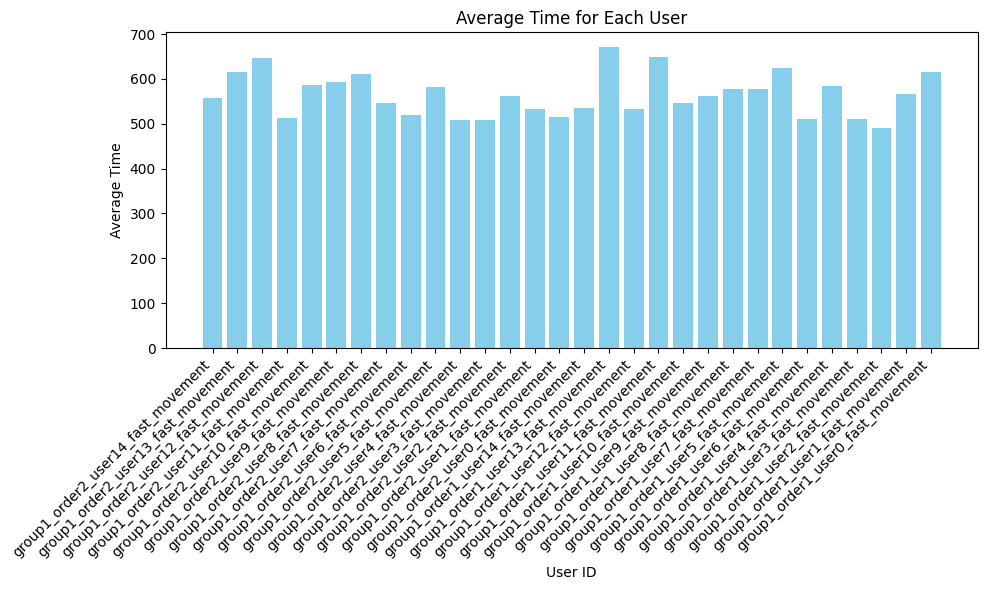

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_time(file_path):
    """
    Calculate the average time for a user from a CSV file.
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Calculate the average time
    average_time = df['time'].mean()
    return average_time

def plot_average_times(directory):
    """
    Plot the average time for each user from CSV files in a directory.
    """
    user_average_times = {}  # Dictionary to store average times for each user
    # Iterate through each CSV file in the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.csv'):
            # Calculate the average time for the user
            user_id = file_name[:-4]  # Extract user ID from file name
            average_time = calculate_average_time(file_path)
            user_average_times[user_id] = average_time

    # Plot the average times
    plt.figure(figsize=(10, 6))
    plt.bar(user_average_times.keys(), user_average_times.values(), color='skyblue')
    plt.xlabel('User ID')
    plt.ylabel('Average Time')
    plt.title('Average Time for Each User')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming directory contains the path to the directory with CSV files
plot_average_times(beat_saber_directory)


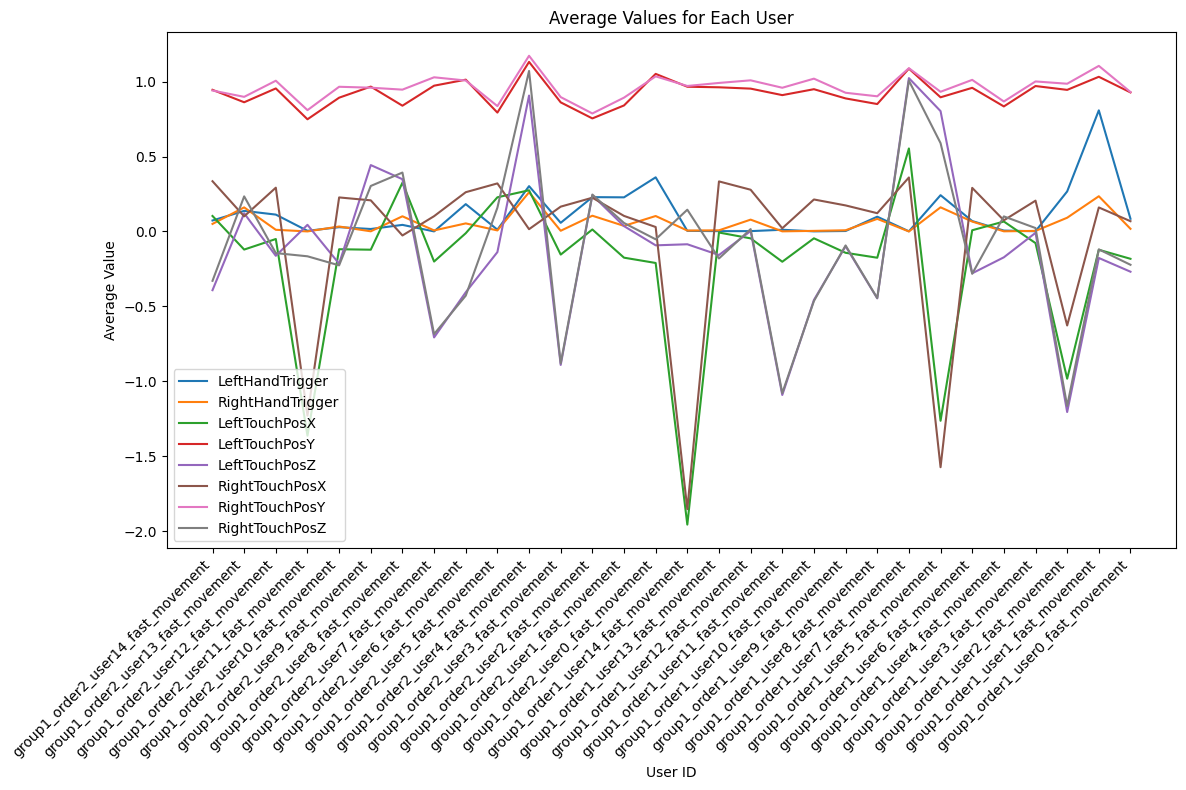

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_values(file_path, columns):
    """
    Calculate the average values for selected columns from a CSV file.
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Calculate the average values for selected columns
    avg_values = df[columns].mean()
    return avg_values

def plot_average_values(directory, columns):
    """
    Plot the average values for selected columns from CSV files in a directory.
    """
    user_avg_values = {}  # Dictionary to store average values for each user
    # Iterate through each CSV file in the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.csv'):
            # Calculate the average values for the user
            user_id = file_name[:-4]  # Extract user ID from file name
            avg_values = calculate_average_values(file_path, columns)
            user_avg_values[user_id] = avg_values

    # Plot the average values for each column
    plt.figure(figsize=(12, 8))
    for column in columns:
        plt.plot(user_avg_values.keys(), [avg_values[column] for avg_values in user_avg_values.values()], label=column)
    plt.xlabel('User ID')
    plt.ylabel('Average Value')
    plt.title('Average Values for Each User')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Columns to calculate average values for
columns = ['LeftHandTrigger', 'RightHandTrigger', 'LeftTouchPosX', 'LeftTouchPosY',
           'LeftTouchPosZ', 'RightTouchPosX', 'RightTouchPosY', 'RightTouchPosZ']

# Assuming directory contains the path to the directory with CSV files
plot_average_values(beat_saber_directory, columns)


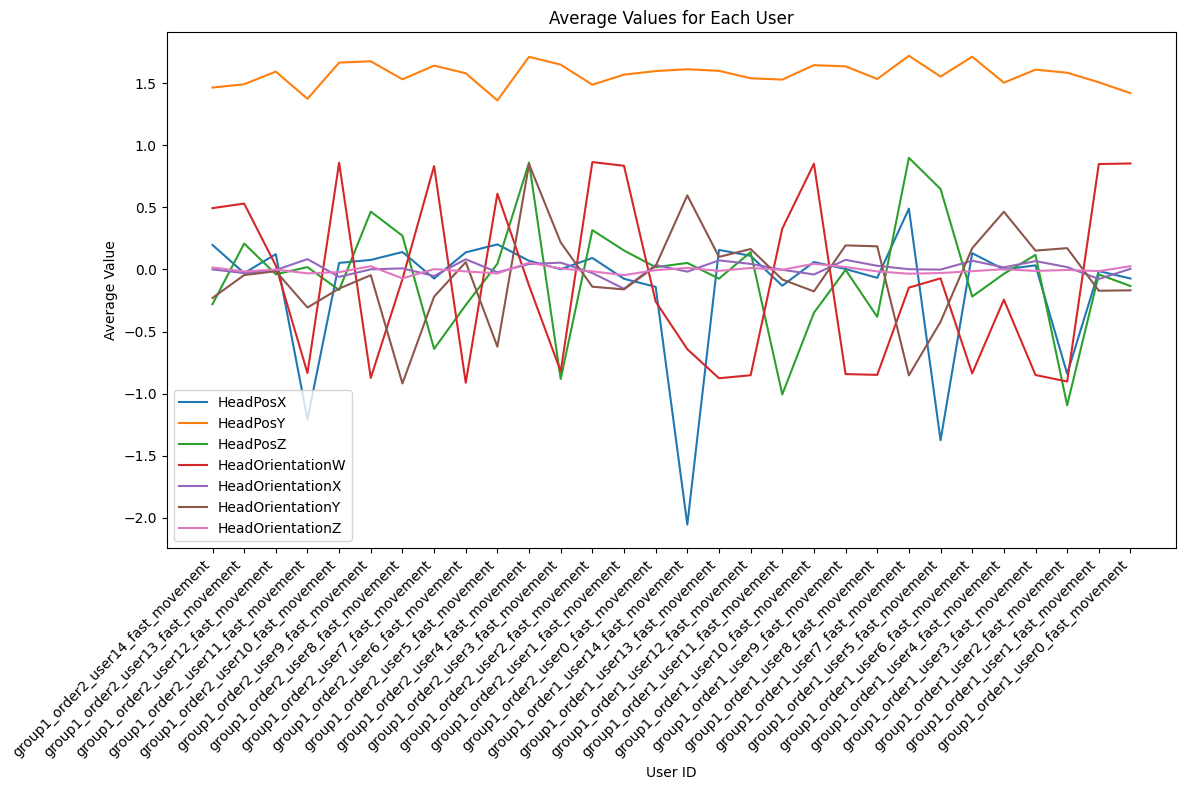

In [ ]:
def calculate_average_values(file_path, columns):
    """
    Calculate the average values for selected columns from a CSV file.
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Calculate the average values for selected columns
    avg_values = df[columns].mean()
    return avg_values

def plot_average_values(directory, columns):
    """
    Plot the average values for selected columns from CSV files in a directory.
    """
    user_avg_values = {}  # Dictionary to store average values for each user
    # Iterate through each CSV file in the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.csv'):
            # Calculate the average values for the user
            user_id = file_name[:-4]  # Extract user ID from file name
            avg_values = calculate_average_values(file_path, columns)
            user_avg_values[user_id] = avg_values

    # Plot the average values for each column
    plt.figure(figsize=(12, 8))
    for column in columns:
        plt.plot(user_avg_values.keys(), [avg_values[column] for avg_values in user_avg_values.values()], label=column)
    plt.xlabel('User ID')
    plt.ylabel('Average Value')
    plt.title('Average Values for Each User')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Columns to calculate average values for
columns = ['HeadPosX', 'HeadPosY', 'HeadPosZ',
       'HeadOrientationW', 'HeadOrientationX', 'HeadOrientationY',
       'HeadOrientationZ']

# Assuming directory contains the path to the directory with CSV files
plot_average_values(beat_saber_directory, columns)